In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [44]:
def xgboost(train, label_train, test, label_test, evaluate = 't', search = 'g'):
    import xgboost as xgb
    xgb_params = {'max_depth': [2,3], 
              'learning_rate': [x/10 for x in list(range(1,7))],
              'n_estimators': [0, 25, 50],
              'objective': ['binary:logistic']}
    xgb_model = xgb.XGBClassifier(gamma=1, random_state=42, reg_lambda=200, use_label_encoder=False, eval_metric = 'logloss')
    if search == 'g':
        xgb_model = GridSearchCV(xgb_model, xgb_params, scoring='roc_auc')
        xgb_model.fit(train, label_train)
        print(xgb_model.best_estimator_)
    else:
        xgb_model = RandomizedSearchCV(xgb_model, xgb_params)
        xgb_model.fit(train, label_train)
        print(xgb_model.best_params_)
        print(xgb_model.best_score_)
        
    if evaluate == 't':
        evaluate_model(xgb_model, train, label_train)
    else:
        evaluate_model(xgb_model, test, label_test)
    

In [45]:
def randomforest(train, label_train, test, label_test, evaluate = 't', search = 'g'):
    rfc_params = {'n_estimators': [100, 150, 200],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [3,4,5,6],
                'criterion' :['gini', 'entropy'],
                'random_state': [42]}

    rfc_model = RandomForestClassifier()

    if search == 'g':
        rfc_model = GridSearchCV(rfc_model, rfc_params, scoring='roc_auc')
        rfc_model = rfc_model.fit(train, label_train)
        print(rfc_model.best_estimator_)
    else:
        rfc_model = RandomizedSearchCV(rfc_model, rfc_params)
        rfc_model = rfc_model.fit(train, label_train)
        print(rfc_model.best_params_)
        print(rfc_model.best_score_)

    if evaluate == 't':
        evaluate_model(rfc_model, train, label_train)
    else:
        evaluate_model(rfc_model, test, label_test)

In [46]:
def decisiontree (train, label_train, test, label_test, evaluate = 't', search = 'g'):
    dt_params = {"criterion":['gini','entropy'],
                 'max_depth':[3,4,5,6,7,8],
                 'random_state': [42]}

    dt_model = DecisionTreeClassifier()
    if search == 'g':
        dt_model = GridSearchCV(dt_model, dt_params, scoring='roc_auc')
        dt_model.fit(train, label_train)
        print(dt_model.best_estimator_)
    else:
        dt_model = RandomizedSearchCV(dt_model, dt_params)
        dt_model = dt_model.fit(train, label_train)
        print(dt_model.best_params_)
        print(dt_model.best_score_)
    
    if evaluate == 't':
        evaluate_model(dt_model, train, label_train)
    else:
        evaluate_model(dt_model, test, label_test)

In [47]:
def evaluate_model(model, test, label_test):
    predicted = model.predict(test)
    print("accuracy:", str(accuracy_score(label_test, predicted)))
    
    print("precision:", str(precision_score(label_test, predicted, average='weighted')))

    print("recall:", str(recall_score(label_test, predicted, average='weighted')))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    print("metrics.roc_auc_score", str(roc_auc_score(label_test, predicted, average='weighted')))

    plot_confusion_matrix(model, test, label_test,
                      display_labels=list(set(label_test)),
                      cmap=plt.cm.Blues)
    
    classification = classification_report(label_test, predicted)
    print(classification)

In [48]:
train_data = pd.read_csv('./data_preprocess_v2/v2_train_df_day_5_1.csv')
test_data = pd.read_csv('./data_preprocess_v2/v2_test_df_day_5_1.csv')

In [49]:
ss = MinMaxScaler()
train_mov = train_data["movement"]
test_mov = test_data["movement"]
col_name = train_data.drop(["movement"],1).columns
train_data = pd.DataFrame(ss.fit_transform(train_data.drop(["movement"],1)))
test_data = pd.DataFrame(ss.fit_transform(test_data.drop(["movement"],1)))
train_data.columns = col_name
test_data.columns = col_name
train_data["movement"] = train_mov
test_data["movement"] = test_mov

In [50]:
label_train = train_data["movement"].astype(int)
train = train_data.drop(["Close (t)","movement"],1)
label_test = test_data["movement"].astype(int)
test = test_data.drop(["Close (t)","movement"],1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=200,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
accuracy: 0.5216494845360825
precision: 0.4931205121334446
recall: 0.5216494845360825
f1 0.4216758959766935
metrics.roc_auc_score 0.4970433135367602
              precision    recall  f1-score   support

           0       0.45      0.09      0.14       456
           1       0.53      0.91      0.67       514

    accuracy                           0.52      

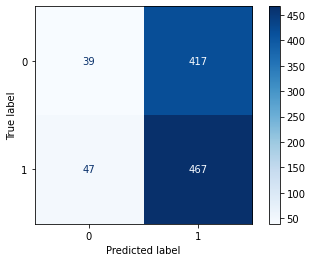

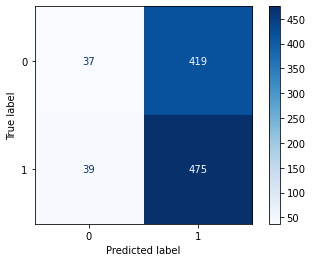

In [51]:
#xgb_g_train = xgboost(train, label_train, test, label_test)
xgb_g_test = xgboost(train, label_train, test, label_test,  evaluate = 's')
#xgb_r_train = xgboost(train, label_train, test, label_test, search = 'r')
xgb_r_test = xgboost(train, label_train, test, label_test, evaluate = 's', search = 'r')

In [52]:
#rfc_g_train = randomforest(train, label_train, test, label_test, )
rfc_g_test = randomforest(train, label_train, test, label_test,  evaluate = 's')
#rfc_r_train = randomforest(train, label_train, test, label_test,  search = 'r')
rfc_r_test = randomforest(train, label_train, test, label_test,  evaluate = 's', search = 'r')

KeyboardInterrupt: 

DecisionTreeClassifier(max_depth=4, random_state=42)
accuracy: 0.5216494845360825
precision: 0.48785632466044837
recall: 0.5216494845360825
f1 0.4114241647541785
metrics.roc_auc_score 0.49605348487951406
              precision    recall  f1-score   support

           0       0.44      0.07      0.12       456
           1       0.53      0.92      0.67       514

    accuracy                           0.52       970
   macro avg       0.49      0.50      0.39       970
weighted avg       0.49      0.52      0.41       970

{'random_state': 42, 'max_depth': 4, 'criterion': 'entropy'}
0.5163208892535506
accuracy: 0.5020618556701031
precision: 0.47876150512010224
recall: 0.5020618556701031
f1 0.45416856850554815
metrics.roc_auc_score 0.48437606662570826
              precision    recall  f1-score   support

           0       0.43      0.19      0.26       456
           1       0.52      0.78      0.62       514

    accuracy                           0.50       970
   macro avg       

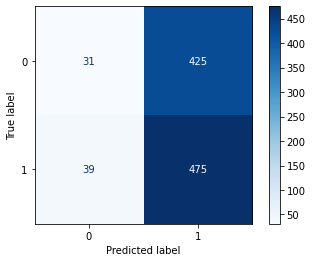

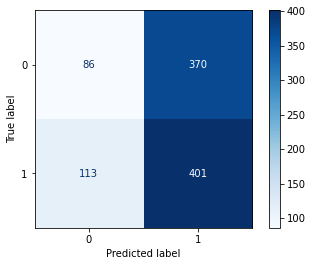

In [53]:
#dt_g_train = decisiontree(train, label_train, test, label_test)
dt_g_test = decisiontree(train, label_train, test, label_test, evaluate = 's')
#dt_r_train = decisiontree(train, label_train, test, label_test, search = 'r')
dt_r_test = decisiontree(train, label_train, test, label_test, evaluate = 's', search = 'r')